***

## Correlação e regressão linear simples

***

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média do Dia (°C)
- **consumo** - Consumo de Cerveja (litros)


---

In [1]:
# Importação das bibliotecas:

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from scipy.stats import probplot
import matplotlib.pyplot as plt

In [2]:
# Importação do dataset:

dados = pd.read_csv('data/dados_cerveja.csv', sep = ';')

In [3]:
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


#### Temos que Y, variável dependente, é o consumo de cerveja (em litros)
#### X, variável independente, é a temperatura média do dia (em graus)

In [4]:
# Estatísticas descritivas dos dados:

dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica: boxplot para cada uma das variáveis.

<AxesSubplot:title={'center':'Boxplot do Consumo de Cerveja'}, xlabel='Consumo (litros)'>

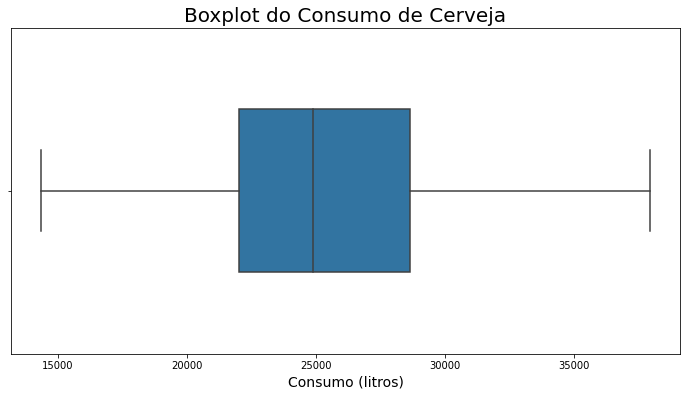

In [5]:
ax = sns.boxplot(data = dados, x = 'Y', orient = 'h', width = 0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot do Consumo de Cerveja', fontsize = 20)
ax.set_xlabel('Consumo (litros)', fontsize = 14)
ax

<AxesSubplot:title={'center':'Boxplot da Temperatura Média'}, xlabel='Temperatura Média (graus)'>

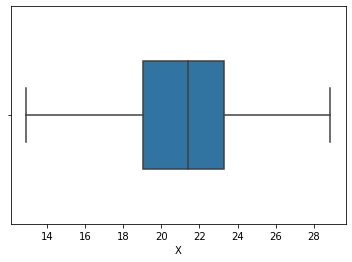

In [9]:
x = sns.boxplot(data = dados, x = 'X', orient = 'h', width = 0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot da Temperatura Média', fontsize = 20)
ax.set_xlabel('Temperatura Média (graus)', fontsize = 14)
ax

### Identificando uma possível relação linear entre as variáveis $Y$ e $X$

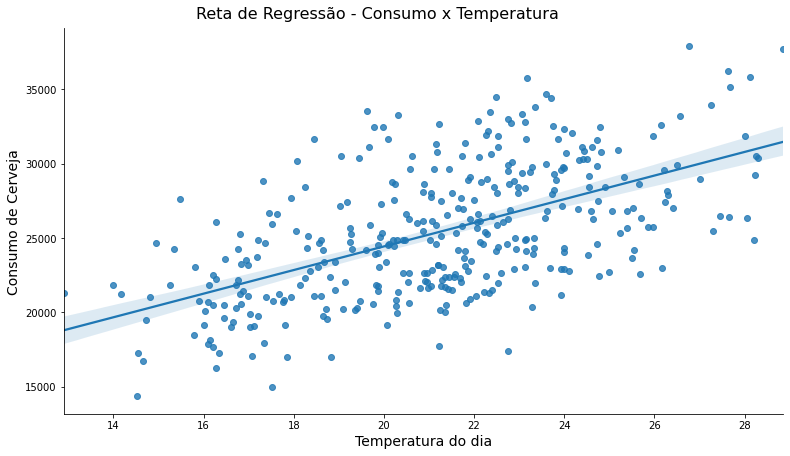

In [10]:
# Investigação gráfica:

ax = sns.lmplot(x = 'X', y = 'Y', data = dados)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura', fontsize = 16, y = 1.02)
ax.set_xlabels('Temperatura do dia', fontsize = 14)
ax.set_ylabels('Consumo de Cerveja', fontsize = 14)
ax

In [11]:
# Matriz de Correlação:

dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


#### É possível notar, pela análise gráfica e pela matriz de correlação, que é provável que exista relação linear entre as variáveis em questão.

### Preparação dos dados para estimar um modelo de regressão linear simples

In [12]:
Y = dados['Y']
X = sm.add_constant(dados['X'])

### Estimação do modelo de regressão linear simples:

In [13]:
regressao_cerveja = sm.OLS(Y,X).fit()

### Visualização do resultado da regressão:

In [14]:
print(regressao_cerveja.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           1.87e-33
Time:                        14:54:17   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Adicionando a coluna '$Y$_previsto':

In [15]:
# Fazendo a previsão de valores já conhecidos:

dados['Y_previsto'] = regressao_cerveja.predict()
dados.head()

,Y,X,Y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


### Utilizando o modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [19]:
previsao_42 = (regressao_cerveja.predict([1,42]))[0].round(0)
print(f'A previsão de consumo de cerveja para um dia com temperaturas de 42°C é {previsao_42} litros de cerveja.')

A previsão de consumo de cerveja para um dia com temperaturas de 42°C é 41914.0 litros de cerveja.


### Obtendo os resíduos da regressão:

In [20]:
# Criando a coluna 'Resíduos':

dados['Residuos'] = regressao_cerveja.resid
dados.head()

,Y,X,Y_previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Plot do gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto:

Text(0, 0.5, 'Resíduos')

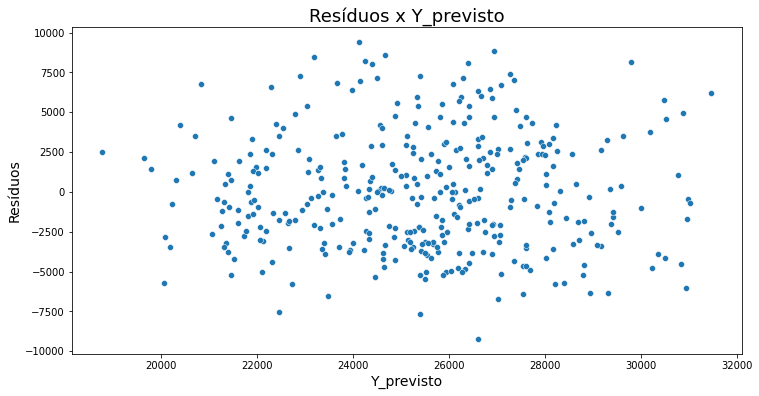

In [21]:
ax = sns.scatterplot(x = dados['Y_previsto'], y = dados['Residuos'])
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos x Y_previsto', fontsize = 18)
ax.set_xlabel('Y_previsto', fontsize = 14)
ax.set_ylabel('Resíduos', fontsize = 14)

#### Os resíduos parecem estar dispostos de maneira aleatória, como esperado.

### Obtenção o QQPlot dos resíduos:

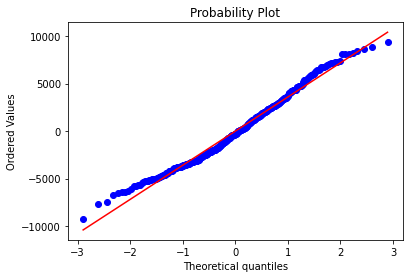

In [22]:
(_,(_,_,_)) = probplot(dados['Residuos'], plot = plt)

### Obtenção do R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [23]:
# Calculando o SQR:

SQR = dados['Y_previsto'].apply(lambda y: (y - dados['Y'].mean())**2).sum()
SQR

2325899486.7377872

In [24]:
# Calculando o SQT:

SQT = dados['Y'].apply(lambda y: (y - dados['Y'].mean())**2).sum()
SQT

7044294174.805479

In [25]:
# Calculando R2:

R_2 = SQR/SQT
R_2

0.33018204933243217

### Obtenção do R² da regressão com o statsmodels:

In [26]:
# Calculando com o statsmodels:

R_2 = regressao_cerveja.rsquared
R_2

0.330182049332432

#### Com esse estudo, é possível perceber que existe sim uma relação linear entre as duas variáveis consideradas. Essa relação é razoavelmente significativa e está apta a gerar modelos para previsões aproximadas.

#### Esta análise preliminar teve o intuito de praticar conceitos de Regressões Lineares.